In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#print(cities)
len(cities)

617

## Perform API Calls

In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key+"&q=" 
    
cities_df=pd.DataFrame(cities)
cities_df=cities_df.rename(columns={0:"city"})
cities_df['lat'] = ""
cities_df['lon'] = ""
cities_df['hum'] = ""
cities_df['cloud'] = ""
cities_df['wind'] = ""
cities_df['country'] = ""
cities_df['date'] = ""
cities_df["temp_max"]=""

for index, row in cities_df.iterrows():
    city=row["city"]
    
    print(f'Checking City #{index}: {city}')
    
    city=city.replace(" ", "+")
    #print(url+city)
    response = requests.get(url+city).json()
    
    try:
        cities_df.loc[index, 'lat'] = response['coord']['lat']
        cities_df.loc[index, 'lon'] = response['coord']['lon']
        cities_df.loc[index, 'hum'] = response['main']['humidity']
        cities_df.loc[index, 'cloud'] = response['clouds']['all']
        cities_df.loc[index, 'wind'] = response['wind']['speed']
        cities_df.loc[index, 'country'] = response['sys']['country']
        cities_df.loc[index, 'date'] = response['dt']
        cities_df.loc[index, 'temp_max'] = response['main']['temp_max']
        
    except:
        print("Missing field/result... skipping.")
        

Checking City #0: atuona
Checking City #1: pinkafeld
Checking City #2: hilo
Checking City #3: kapaa
Checking City #4: busselton
Checking City #5: vaini
Checking City #6: hermanus
Checking City #7: iqaluit
Checking City #8: clyde river
Checking City #9: rikitea
Checking City #10: zainsk
Checking City #11: chokurdakh
Checking City #12: mount gambier
Checking City #13: carnarvon
Checking City #14: cape town
Checking City #15: provideniya
Checking City #16: sorong
Checking City #17: hobart
Checking City #18: richard toll
Missing field/result... skipping.
Checking City #19: kultuk
Checking City #20: marsh harbour
Checking City #21: ngunguru
Checking City #22: trincomalee
Checking City #23: santa cruz
Checking City #24: nanortalik
Checking City #25: alexandria
Checking City #26: cam ranh
Checking City #27: yellowknife
Checking City #28: gamba
Checking City #29: kumsi
Checking City #30: albany
Checking City #31: barrow
Checking City #32: beloha
Checking City #33: bathsheba
Checking City #34: 

Checking City #249: sciacca
Checking City #250: corn island
Checking City #251: tubuala
Checking City #252: lata
Checking City #253: grande prairie
Checking City #254: yerbogachen
Checking City #255: lompoc
Checking City #256: saint-philippe
Checking City #257: hollins
Checking City #258: bafra
Missing field/result... skipping.
Checking City #259: luderitz
Checking City #260: shatoy
Checking City #261: price
Checking City #262: sundumbili
Checking City #263: bengkalis
Missing field/result... skipping.
Checking City #264: halalo
Missing field/result... skipping.
Checking City #265: rapid valley
Checking City #266: tezu
Checking City #267: hammerfest
Checking City #268: codrington
Checking City #269: silivainiotika
Missing field/result... skipping.
Checking City #270: shestakovo
Checking City #271: zorritos
Checking City #272: dhidhdhoo
Checking City #273: umm lajj
Checking City #274: dekoa
Missing field/result... skipping.
Checking City #275: kerteh
Missing field/result... skipping.
Che

Checking City #502: goderich
Checking City #503: jawa
Checking City #504: govindgarh
Checking City #505: mazatlan
Checking City #506: buin
Checking City #507: aguimes
Checking City #508: bend
Checking City #509: qaqortoq
Checking City #510: glazunovka
Checking City #511: oktyabrskiy
Checking City #512: tessalit
Checking City #513: cabedelo
Checking City #514: mahadday weyne
Missing field/result... skipping.
Checking City #515: ust-nera
Checking City #516: ardabil
Checking City #517: envira
Missing field/result... skipping.
Checking City #518: okha
Checking City #519: ostrovnoy
Checking City #520: babu
Checking City #521: salina
Checking City #522: trelew
Checking City #523: hay river
Checking City #524: san andres
Checking City #525: vokhtoga
Checking City #526: nicoya
Checking City #527: jurm
Checking City #528: basco
Checking City #529: yamada
Checking City #530: udachnyy
Checking City #531: naryan-mar
Checking City #532: veinticinco de mayo
Checking City #533: nabire
Checking City #

city        553
lat         553
lon         553
hum         553
cloud       553
wind        553
country     553
date        553
temp_max    553
dtype: int64


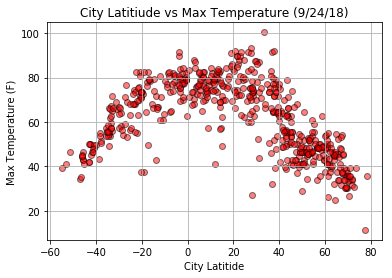

In [12]:
cities_df['lat'].replace('', np.nan, inplace=True)
cities_df_cleaned=cities_df.dropna(how='any')
print(cities_df_cleaned.count())

cities_df_cleaned.to_csv('cities.csv', index=False)

plt.scatter(cities_df_cleaned["lat"], cities_df_cleaned["temp_max"], marker="o", facecolors="red",
            edgecolors="black", alpha=0.5)
plt.title("City Latitiude vs Max Temperature (9/24/18)")
plt.xlabel("City Latitide")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("../Images/Max_temp.png")

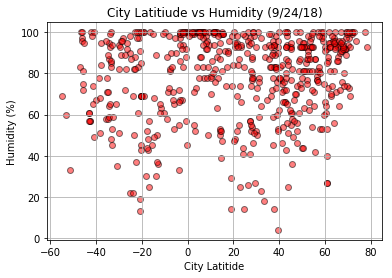

In [13]:
plt.scatter(cities_df_cleaned["lat"], cities_df_cleaned["hum"], marker="o", facecolors="red",
            edgecolors="black", alpha=0.5)
plt.title("City Latitiude vs Humidity (9/24/18)")
plt.xlabel("City Latitide")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("../Images/Humidity.png")

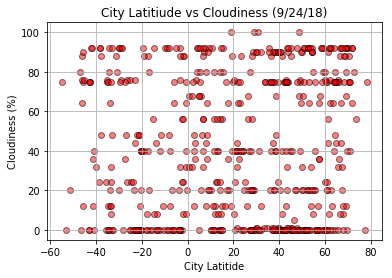

In [14]:
plt.scatter(cities_df_cleaned["lat"], cities_df_cleaned["cloud"], marker="o", facecolors="red",
            edgecolors="black", alpha=0.5)
plt.title("City Latitiude vs Cloudiness (9/24/18)")
plt.xlabel("City Latitide")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("../Images/Cloudiness.png")

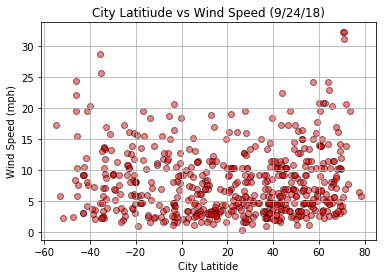

In [15]:
plt.scatter(cities_df_cleaned["lat"], cities_df_cleaned["wind"], marker="o", facecolors="red",
            edgecolors="black", alpha=0.5)
plt.title("City Latitiude vs Wind Speed (9/24/18)")
plt.xlabel("City Latitide")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("../Images/Wind.png")

Trends:

- The highest maximum temperatures are in the 0-20degF latitude
- The highest wind speeds are seen at the most extreem latitudes
- There seems to be no corrilation of % humidity or cloudiness to latitude.